# DIGIT RECOGNISER

### This project use mnist dataset to recognise the digit using the given image . first we need to preprocess the image ie. converting the image into pixel values(0,1).

### I assume in this project that if we have preprocessed image ie if we have witch is converted.  

### In MNIST dataset the given data has pixel values using this data we can design model to predict the digits  

In [1]:
# importing the necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the data using pandas dataframe 
data = pd.read_csv("train.csv")
data1=pd.read_csv("test.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
data.shape

(42000, 785)

#### from the above output we can see that the data have 42000 data points . and each data have 784 features and 1 target value 

In [4]:
#visulising the data by reading the first few lines of the data 
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### from the above output we can see that the first coloumn contain the label (target value = 0 to 9) and 784 column which values equal to 0 or 1. 784 column represent 28*28 pixel value image.

#### In the below code we try to restore the 784 pixel value into a 28*28 image try to visulise image 

In [5]:
#visulising any digit by the given pixel values

def display (i) :
    img = data.loc[[i]]
    #print(img)
    #print(img.shape)
    img = img.drop('label',axis=1)
    #print(img)
    #print(img.shape)
    plt.title('example %d. label %d' % (i,data.loc[i,'label']))
    plt.imshow(img.values.reshape(28,28),cmap=plt.cm.gray_r)

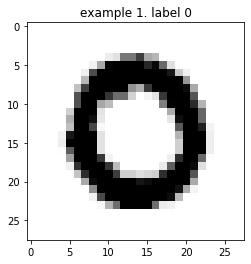

In [6]:
display(1)

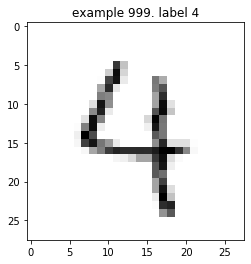

In [7]:
display(999)

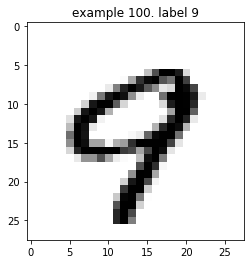

In [8]:
display(100)

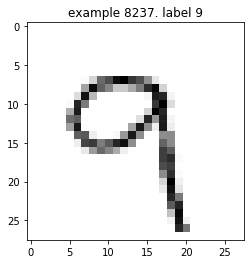

In [9]:
import random as rand
i= rand.randrange(1,10000)
display(i)

#### from the above observstion we can understand we have a range of data with good images while some are with bad pixel images .

In [10]:
#plt.hist(data['label'])
#?? plt.bar
data['label'].value_counts()


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

#### from the above plot we can easily see that the data have almost equal points of all category 


#### for more clear visulising the count of all data we will plot the bar graph of it 

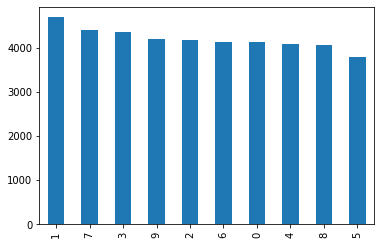

In [11]:
#fig,ax = plt.subplots()
data['label'].value_counts().plot(kind='bar')

#### As we have many datapoints in each group type taking all the points can make the model process too much slow so for making our model to work fast we select same no of points from each label randomly and then train our model for predicting the output values 

In [12]:
print(data.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [13]:
X=data.drop('label',axis=1)
y=data['label']
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(33600, 784)
(8400, 784)


In [15]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X,y)


/home/kapil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = reg.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred)

array([[831,   0,   2,   3,   0,   6,   8,   0,   6,   1],
       [  0, 917,   6,   2,   0,   1,   0,   1,   8,   1],
       [  1,   7, 752,  14,   9,   3,   6,   7,  18,   4],
       [  1,   4,  14, 809,   0,  21,   2,   6,  13,   4],
       [  1,   3,   4,   2, 772,   1,   7,   1,   9,  22],
       [  6,   0,   9,  33,   8, 648,   7,   3,  22,   5],
       [  4,   3,   5,   0,   3,  10, 828,   0,   2,   1],
       [  1,   3,   5,   2,   5,   1,   0, 807,   0,  25],
       [  9,   4,   7,  17,   4,   6,   5,   1, 773,   3],
       [  6,   3,   3,   6,  20,   4,   0,  25,  11, 737]])

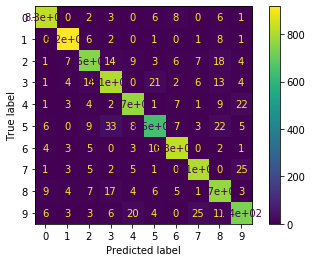

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(reg,X_test,y_test)

In [19]:
reg.score(X_test,y_test)

0.9373809523809524

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y1_pred = reg.predict(data1)

In [21]:
print(y1_pred)

[2 0 9 ... 3 9 2]


In [22]:
f = open("demofile2.txt", "w")
f.write("imageid,Label\n")
for i in range (0,data1.shape[0]):
    f.write(str(i+1))
    f.write(",")
    f.write(str(y1_pred[i]))
    f.write("\n")
f.close()

In [23]:
f = open("demofile2.txt","r")
#print(f.read()) 